In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [39]:
# Load dataset
data = pd.read_csv('ABC_company_data.csv')
ABC_company_data = data.copy()
ABC_company_data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [40]:
ABC_company_data.shape

(458, 9)

In [41]:
ABC_company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [42]:
ABC_company_data.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [43]:
ABC_company_data.columns
ABC_company_data['Height'] = np.random.uniform(150, 180, len(ABC_company_data)).round(2)
type(ABC_company_data['Height'])


pandas.core.series.Series

In [44]:
ABC_company_data = ABC_company_data.rename(columns={'Height': 'Height_cm',
                                                    'Weight': 'Weight_lbs'})
ABC_company_data['Weight_Kg'] = (ABC_company_data['Weight_lbs']/2.2046).round(2)

ABC_company_data.head()


,Name,Team,Number,Position,Age,Height_cm,Weight_lbs,College,Salary,Weight_Kg
0,Avery Bradley,Boston Celtics,0,PG,25,173.96,180,Texas,7730337.0,81.65
1,Jae Crowder,Boston Celtics,99,SF,25,156.03,235,Marquette,6796117.0,106.60
2,John Holland,Boston Celtics,30,SG,27,155.92,205,Boston University,NaN,92.99
3,R.J. Hunter,Boston Celtics,28,SG,22,174.66,185,Georgia State,1148640.0,83.92
4,Jonas Jerebko,Boston Celtics,8,PF,29,164.45,231,NaN,5000000.0,104.78


In [45]:
ABC_company_data.dtypes

Name           object
Team           object
Number          int64
Position       object
Age             int64
Height_cm     float64
Weight_lbs      int64
College        object
Salary        float64
Weight_Kg     float64
dtype: object

In [46]:
ABC_company_data.isna().sum()

Name           0
Team           0
Number         0
Position       0
Age            0
Height_cm      0
Weight_lbs     0
College       84
Salary        11
Weight_Kg      0
dtype: int64

Text(0.5, 0, 'Salary')

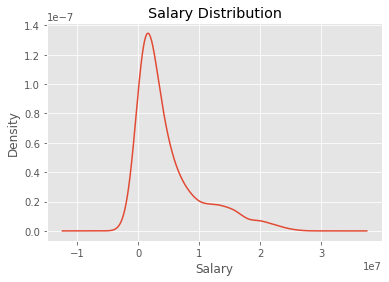

In [47]:
ax = ABC_company_data['Salary'].plot(kind='kde',
                               title='Salary Distribution')
ax.set_xlabel('Salary')

In [48]:
salary_median = ABC_company_data['Salary'].median()
ABC_company_data['Salary'].fillna(value=salary_median, inplace=True)
ABC_company_data.isna().sum()

Name           0
Team           0
Number         0
Position       0
Age            0
Height_cm      0
Weight_lbs     0
College       84
Salary         0
Weight_Kg      0
dtype: int64

In [49]:
ABC_company_data.head()

,Name,Team,Number,Position,Age,Height_cm,Weight_lbs,College,Salary,Weight_Kg
0,Avery Bradley,Boston Celtics,0,PG,25,173.96,180,Texas,7730337.0,81.65
1,Jae Crowder,Boston Celtics,99,SF,25,156.03,235,Marquette,6796117.0,106.60
2,John Holland,Boston Celtics,30,SG,27,155.92,205,Boston University,2836186.0,92.99
3,R.J. Hunter,Boston Celtics,28,SG,22,174.66,185,Georgia State,1148640.0,83.92
4,Jonas Jerebko,Boston Celtics,8,PF,29,164.45,231,NaN,5000000.0,104.78


In [50]:
ABC_company_data['College'].value_counts()

Kentucky           22
Duke               20
Kansas             19
North Carolina     16
UCLA               15
                   ..
Utah Valley         1
Cleveland State     1
Iowa State          1
Florida State       1
Baylor              1
Name: College, Length: 118, dtype: int64

Text(0, 0.5, 'College')

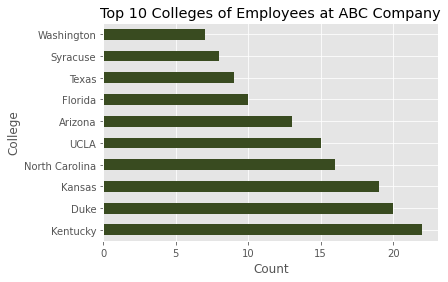

In [70]:
ax = ABC_company_data['College'].value_counts() \
    .head(10) \
    .plot(kind='barh', color='#394b20', title='Top 10 Colleges of Employees at ABC Company')
ax.set_xlabel('Count')
ax.set_ylabel('College')

Text(0.5, 0, 'Salary')

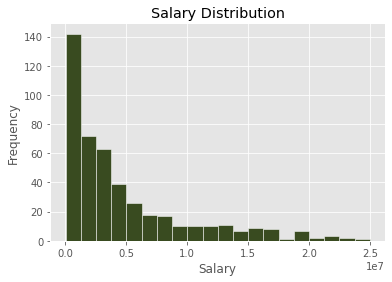

In [104]:
ax = ABC_company_data['Salary'].plot(kind='hist',
                               bins=20,color='#394b20',
                               title='Salary Distribution',
                                edgecolor ='white')
ax.set_xlabel('Salary')

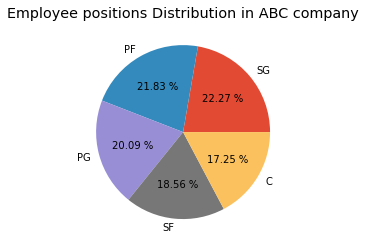

In [108]:
label = ABC_company_data['Position'].value_counts().index
count = ABC_company_data['Position'].value_counts()
plt.pie(count, labels=label, autopct='%.2f %%', )

plt.title('Employee positions Distribution in ABC company')

plt.show()

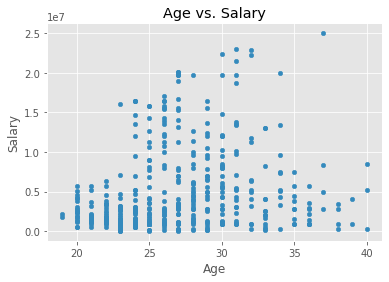

In [54]:
ABC_company_data.plot(kind='scatter', 
        x='Age', 
        y='Salary',
       title='Age vs. Salary')
plt.show()

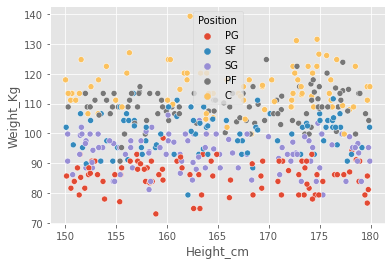

In [55]:
sns.scatterplot(x='Height_cm', 
                y='Weight_Kg',
                hue='Position',
                data=ABC_company_data)
ax.set_title("Weight Vs. Height")
plt.show()

In [56]:
ABC_company_data.head()

,Name,Team,Number,Position,Age,Height_cm,Weight_lbs,College,Salary,Weight_Kg
0,Avery Bradley,Boston Celtics,0,PG,25,173.96,180,Texas,7730337.0,81.65
1,Jae Crowder,Boston Celtics,99,SF,25,156.03,235,Marquette,6796117.0,106.60
2,John Holland,Boston Celtics,30,SG,27,155.92,205,Boston University,2836186.0,92.99
3,R.J. Hunter,Boston Celtics,28,SG,22,174.66,185,Georgia State,1148640.0,83.92
4,Jonas Jerebko,Boston Celtics,8,PF,29,164.45,231,NaN,5000000.0,104.78


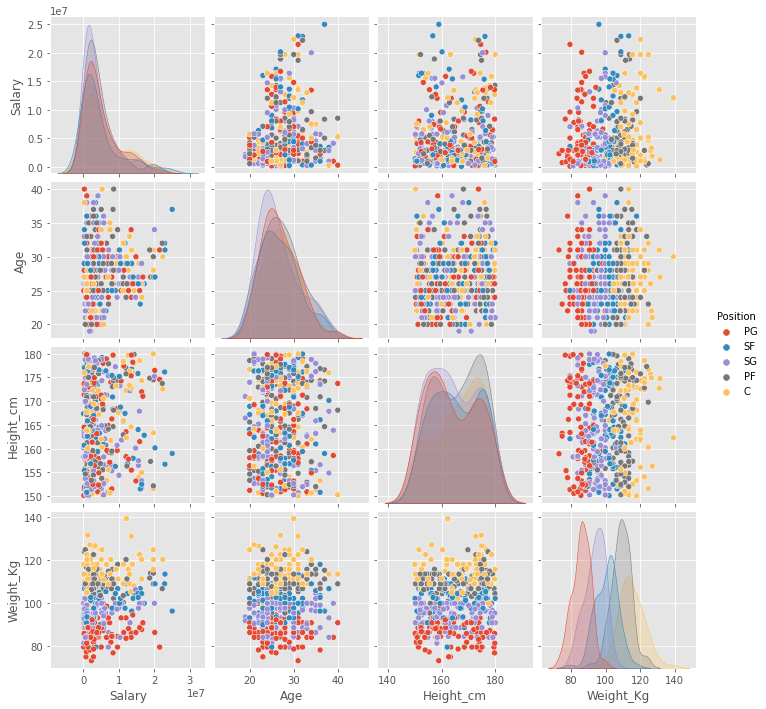

In [57]:
sns.pairplot(ABC_company_data, vars=['Salary',  'Age',
                                    'Height_cm', 'Weight_Kg'],
            hue='Position')
plt.show()

In [58]:
ABC_corr = ABC_company_data[['Salary',  'Age',
            'Height_cm', 'Weight_Kg']].corr()
ABC_corr

,Salary,Age,Height_cm,Weight_Kg
Salary,1.000000,0.209124,0.056365,0.137910
Age,0.209124,1.000000,0.028743,0.086808
Height_cm,0.056365,0.028743,1.000000,0.090198
Weight_Kg,0.137910,0.086808,0.090198,1.000000


<AxesSubplot:>

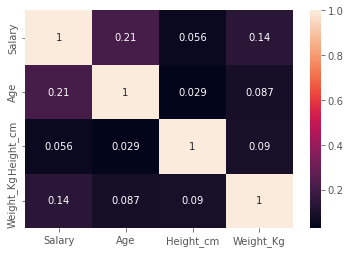

In [59]:
sns.heatmap(ABC_corr, annot=True)

In [60]:
ABC_company_data['Position'].value_counts()

SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64

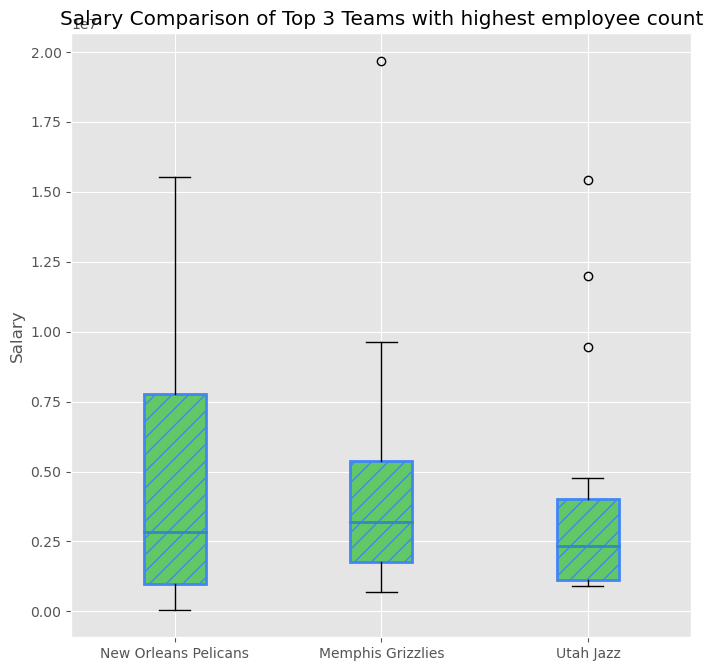

In [68]:
plt.figure(figsize=(8,8), dpi=100)

NOP = ABC_company_data.loc[ABC_company_data.Team == "New Orleans Pelicans"]['Salary']
MG = ABC_company_data.loc[ABC_company_data.Team == "Memphis Grizzlies"]['Salary']
UJ = ABC_company_data.loc[ABC_company_data.Team == "Utah Jazz"]['Salary']

bp = plt.boxplot([NOP, MG, UJ], labels=["New Orleans Pelicans","Memphis Grizzlies","Utah Jazz"], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Salary Comparison of Top 3 Teams with highest employee count')
plt.ylabel('Salary')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#62c766' )
    # change hatch
    box.set(hatch = '//')
    
plt.show()

## How many are there in each Team and the percentage splitting with respect to the total employees.

In [62]:
df = pd.DataFrame(ABC_company_data['Team'].value_counts())
df['Percentage'] = (ABC_company_data['Team'].value_counts(normalize=True)*100).round(2)
df

,Team,Percentage
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28
Washington Wizards,15,3.28


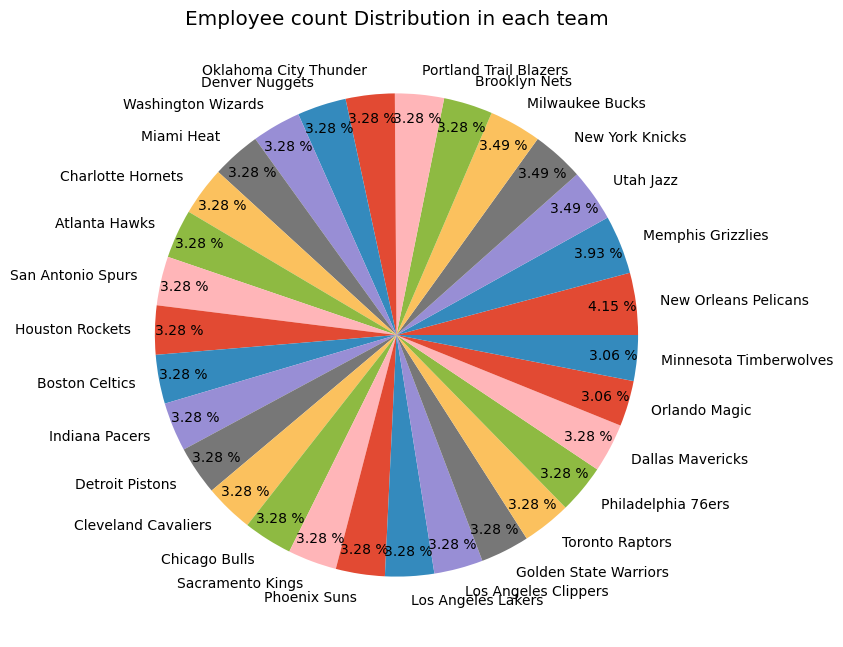

In [63]:
plt.figure(figsize=(8, 8), dpi=100)

label = ABC_company_data['Team'].value_counts().index
count = ABC_company_data['Team'].value_counts()
plt.pie(count, labels=label, autopct='%.2f %%', pctdistance=0.9)

plt.title('Employee count Distribution in each team')

plt.show()

## Overall team statistics

In [64]:
teams = ABC_company_data['Team'].unique()

for i in teams:
    print(f"\nOverall Statistics of Team {i}: \n")
    print(ABC_company_data.loc[ABC_company_data['Team']==i].describe())
    print("\n")


Overall Statistics of Team Boston Celtics: 

          Number        Age   Height_cm  Weight_lbs        Salary   Weight_Kg
count  15.000000  15.000000   15.000000   15.000000  1.500000e+01   15.000000
mean   31.866667  24.733333  167.545333  219.466667  4.091817e+06   99.550667
std    30.300558   2.840188    8.980514   25.606547  3.051428e+06   11.615042
min     0.000000  20.000000  150.900000  180.000000  1.148640e+06   81.650000
25%     9.500000  22.000000  161.620000  197.500000  1.994760e+06   89.585000
50%    28.000000  25.000000  169.590000  220.000000  2.836186e+06   99.790000
75%    42.500000  27.000000  174.310000  236.500000  5.898058e+06  107.280000
max    99.000000  29.000000  179.500000  260.000000  1.200000e+07  117.940000



Overall Statistics of Team Brooklyn Nets: 

          Number        Age   Height_cm  Weight_lbs        Salary   Weight_Kg
count  15.000000  15.000000   15.000000    15.00000  1.500000e+01   15.000000
mean   18.266667  25.600000  162.112667   215.600

## Segregate the employees w.r.t different positions.

In [65]:
ABC_company_data['Position'].value_counts()

SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64

Text(0, 0.5, 'Count')

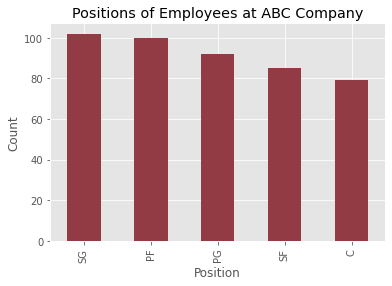

In [72]:
ax = ABC_company_data['Position'].value_counts() \
    .plot(kind='bar', 
          title='Positions of Employees at ABC Company',
          color='#933b45')
ax.set_xlabel('Position')
ax.set_ylabel('Count')

## Find out under which team and position, spending in terms of salary is high.

In [73]:
ABC_company_data['Age'].value_counts()

24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: Age, dtype: int64

Text(0.5, 0, 'Age')

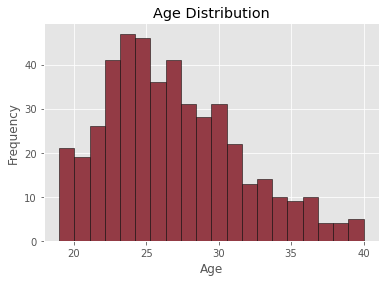

In [78]:
ax = ABC_company_data['Age'].plot(kind='hist',
                               bins=20,
                               title='Age Distribution',
                               color='#933b45', edgecolor='black')
ax.set_xlabel('Age')

In [79]:
team = ABC_company_data['Team'].unique()

df = pd.DataFrame({'Team': team})

total_sal = []
for i in team:
    total_sal.append(ABC_company_data.loc[ABC_company_data['Team']==i, 'Salary'].sum())

df['Total_Salary'] = total_sal

top_spending_teams = df.sort_values(by='Total_Salary', ascending=False).head(5)

top_spending_teams

,Team,Total_Salary
11,Cleveland Cavaliers,109824875.0
6,Los Angeles Clippers,94854640.0
27,Oklahoma City Thunder,93765298.0
5,Golden State Warriors,88868997.0
22,Miami Heat,88188045.0


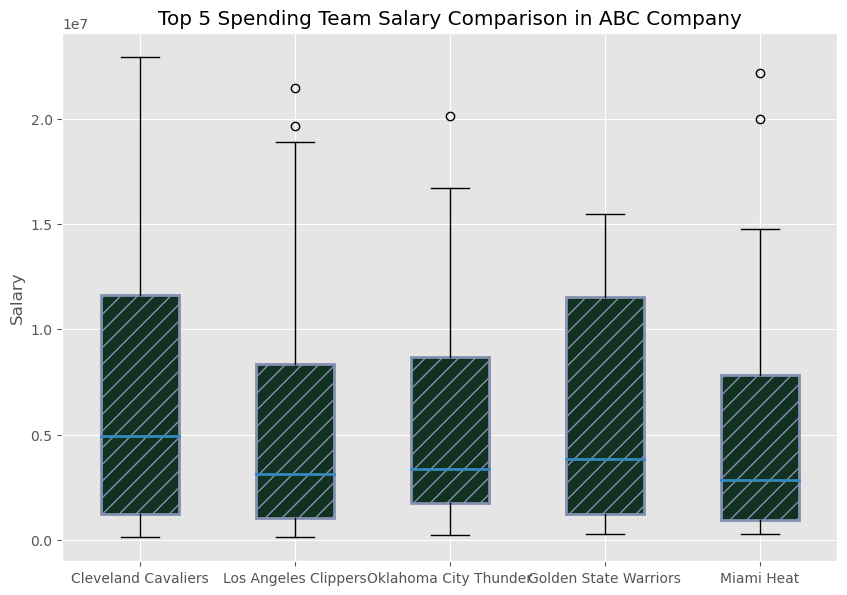

In [92]:
plt.figure(figsize=(10,7), dpi=100)

Cleveland_Cavaliers = ABC_company_data.loc[ABC_company_data.Team=='Cleveland Cavaliers']['Salary']
Los_Angeles_Clippers = ABC_company_data.loc[ABC_company_data.Team=='Los Angeles Clippers']['Salary']
Oklahoma_City_Thunder = ABC_company_data.loc[ABC_company_data.Team=='Oklahoma City Thunder']['Salary']
Golden_State_Warriors = ABC_company_data.loc[ABC_company_data.Team=='Golden State Warriors']['Salary']
Miami_Heat = ABC_company_data.loc[ABC_company_data.Team=='Miami Heat']['Salary']

bp = plt.boxplot([Cleveland_Cavaliers, Los_Angeles_Clippers, Oklahoma_City_Thunder, Golden_State_Warriors, Miami_Heat], 
                 labels=top_spending_teams.iloc[:, 0], 
                 patch_artist=True, 
                 medianprops={'linewidth': 2})

plt.title('Top 5 Spending Team Salary Comparison in ABC Company')
plt.ylabel('Salary')

for box in bp['boxes']:
    # change outline color
    box.set(color='#8590b1', linewidth=2)
    # change fill color
    box.set(facecolor = '#113221' )
    # change hatch
    box.set(hatch = '//')
    
plt.show()

In [93]:
position = ABC_company_data['Position'].unique()

df = pd.DataFrame({'Position': position})

total_sal = []
for i in position:
    total_sal.append(ABC_company_data.loc[(ABC_company_data['Team']=='Cleveland Cavaliers') & 
                                          (ABC_company_data['Position']==i), 
                                          'Salary'].sum())

df['Total_Salary'] = total_sal

spending_per_position = df.sort_values(by='Total_Salary', ascending=False)

spending_per_position

,Position,Total_Salary
3,PF,27882029.0
1,SF,23917776.0
4,C,20486870.0
0,PG,19654777.0
2,SG,17883423.0


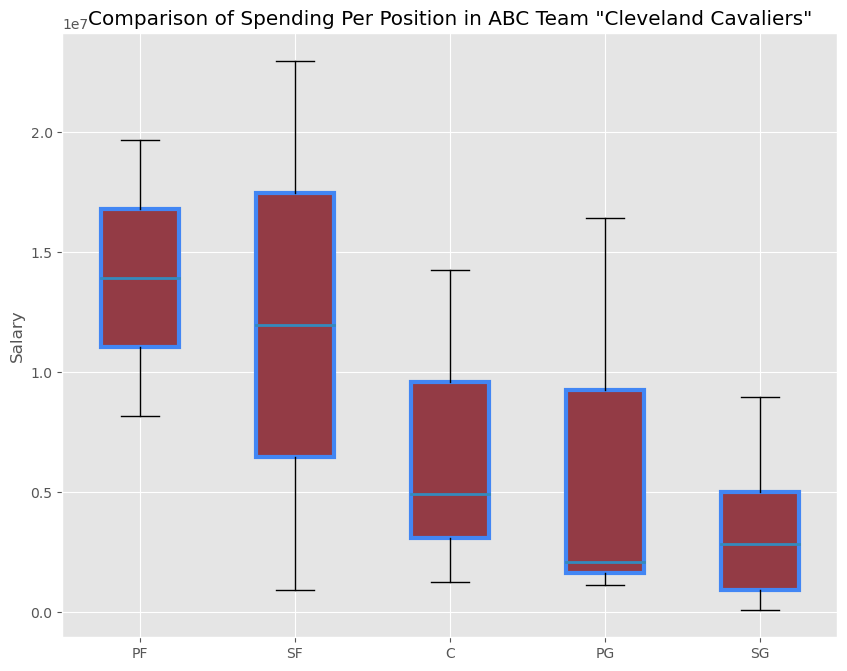

In [96]:
plt.figure(figsize=(10,8), dpi=100)

df = ABC_company_data.loc[ABC_company_data['Team']=='Cleveland Cavaliers']

PF = df.loc[df.Position=='PF']['Salary']
SF = df.loc[df.Position=='SF']['Salary']
C = df.loc[df.Position=='C']['Salary']
PG = df.loc[df.Position=='PG']['Salary']
SG = df.loc[df.Position=='SG']['Salary']

bp = plt.boxplot([PF, SF, C, PG, SG], 
                 labels=spending_per_position.iloc[:, 0], 
                 patch_artist=True, 
                 medianprops={'linewidth': 2})

plt.title('Comparison of Spending Per Position in ABC Team "Cleveland Cavaliers"')
plt.ylabel('Salary')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=3)
    # change fill color
    box.set(facecolor = '#933b45' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()

In [97]:
print("The person that gets the highest salary is: ")
ABC_company_data.loc[ABC_company_data.Salary == ABC_company_data['Salary'].max(), ['Name', 'Team', 'Position', 'Salary']]

The person that gets the highest salary is: 


,Name,Team,Position,Salary
109,Kobe Bryant,Los Angeles Lakers,SF,25000000.0


## Find if there is any correlation between age and salary , represent it visually.

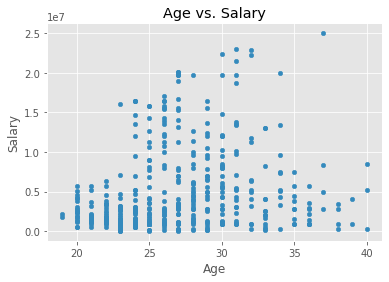

In [101]:
ABC_company_data.plot(kind='scatter', 
        x='Age', 
        y='Salary',
       title='Age vs. Salary')
plt.show()